<h1>6  &nbsp;Estudo comparativo - Soluções numéricas e analítica</h1>

&nbsp; Esta seção tem como objetivo comparar a solução analítica e a aproximação numérica com a população estimada para 2021 pelo IBGE.

&nbsp; Os resultados obtidos pela solução analítica, pelo método de Euler, Euler modificado e RK4:

<center><b>Aproximação populacional para Rio Grande por método</b></center>

| Método | Número de habitantes |
| --- | --- |
| LSODA | 198336.85795442 |
| Euler | 198335.71424191 |
| Euler modificado | 198335.74844755 |
|RK4 |198335.74844762 |
|RK45|  209760.60286601|

<center>Fonte: O autor</center>

&nbsp; Importando bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Declarando o nome dos métodos, aproximações e a população estimada pelo IBGE

In [2]:
metodos = ['LSODA','Euler','Euler modificado','RK4','RK45']

solucoes = [198336.85795442, 198335.71424191, 198335.74844755, 198335.74844762, 209760.60286601]

index = [0,1,2,3,4]

solucao_IBGE = 212881

dados = [[0, 0, 0]]

&nbsp; A seguir, obtemos o erro das soluções obtidas com relação a população fornecida pelo IBGE.

In [3]:
for i in index:
    erro_hab = solucao_IBGE - solucoes[i]
    erro_perc = (solucoes[i]/solucao_IBGE)*100
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[metodos[i],erro_hab,str(round(erro_perc,2))+'%']])
                      

  Finalmente, exibimos os dados armazenados:

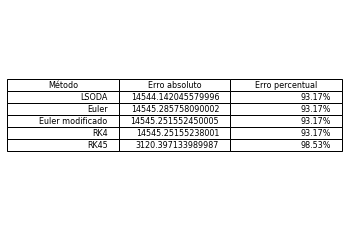

In [4]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()
